# Advanced Product Generation

## Methods to generate a dervied m3 or crism product

1. Calling the method on the read in data: 
    - data.derived_product()
2. Passing the data to the derived product: 
    - derived_produc(data)
3. Calling the derived_product_func and defining the bands to be used: 
    - derived_product_func(data.loc[[list_of_bands]])
    - derived_product_func(data.loc[[list_of_bands], [list_of_y_values], [list_of_x_values]])
4. Calling the generic_func and passing the associated parameters:
    - generic_func(data, [wavelengths], func=derived_product_func)

For a more detailed understanding of this structure checkout the documentation.

|  **data**: Object read in via plio on either m3 or crism images <br>
|  **derived_product**: Name of the derived product like tilt or curvature <br>
|  **generic_func**: Function that applies other functions to data <br>
|  **derived_product_func**: Lower level function that performs the mathematical operations on the bands

**This notebook focuses on methods 3 and 4**

## Load the necessary modules

|  The functions to generate the derived products can be found in the libpyhat library, while the data needs to be read in through plio. <br> The libpyhat functions can be applied in a variety of different ways giving jupyter notebook users more leverage when generating derived products.<br>
|  <br>
|  To generate M3 products specifically we will need the M3 reader from plio along with some functions from the libpyhat library.

In [1]:
# Uses any files found in the libpyhat example directory
# DO NOT use this for your own images
from libpyhat.examples import get_path

# Import the data reader from plio
from plio.io.io_moon_minerology_mapper import M3

# Setup some basic ploting
import matplotlib.pyplot as plt
%pylab inline
figsize(10,10)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Read the data in using the M3 object from plio
m3_data = M3(get_path("M3_4030seg_L2_aristcrater.tif"))
m3_data.wavelengths

array([ 540.84,  580.76,  620.69,  660.61,  700.54,  730.48,  750.44,
        770.4 ,  790.37,  810.33,  830.29,  850.25,  870.21,  890.17,
        910.14,  930.1 ,  950.06,  970.02,  989.98, 1009.95, 1029.91,
       1049.87, 1069.83, 1089.79, 1109.76, 1129.72, 1149.68, 1169.64,
       1189.6 , 1209.57, 1229.53, 1249.49, 1269.45, 1289.41, 1309.38,
       1329.34, 1349.3 , 1369.26, 1389.22, 1409.19, 1429.15, 1449.11,
       1469.07, 1489.03, 1508.99, 1528.96, 1548.92, 1578.86, 1618.79,
       1658.71, 1698.63, 1738.56, 1778.48, 1818.4 , 1858.33, 1898.25,
       1938.18, 1978.1 , 2018.02, 2057.95, 2097.87, 2137.8 , 2177.72,
       2217.64, 2257.57, 2297.49, 2337.42, 2377.34, 2417.26, 2457.19,
       2497.11, 2537.03, 2576.96, 2616.88, 2656.81, 2696.73, 2736.65,
       2776.58, 2816.5 , 2856.43, 2896.35, 2936.27, 2976.2 ])

## Custom Wavelength Selection

|  Using custom indexing, specific wavelengths can be selected and used in the various derived product functions. <br>
|  <br>
|  Tilt by default uses 930 and 1009 but this can be changed to apply tilt to which ever wavelengths necessary.

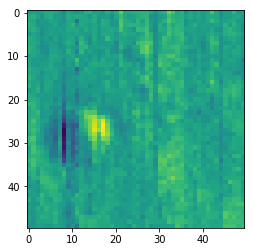

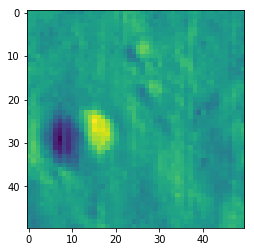

In [3]:
from libpyhat.derived.m3.supplemental_funcs import tilt_func

# Default
res = tilt_func(m3_data.loc[[930, 1009], :, :])
imshow(res)
show()

# Apply tilt to wavelengths 540 and 850
res = tilt_func(m3_data.loc[[540, 850], :, :])
imshow(res)
show()

## Custom Wavelength Selection and Function Application Via generic_func

|  Similarly to the above example, generic_func allows users to select both the wavelengths <br> to apply a function to along with other parameters like kernels, and if the wavelengths <br> themselves should be passed along to the function<br>
|  <br>
|  Again, tilt by default uses 930 and 1009 but this can be changed to apply tilt to which ever wavelengths necessary.

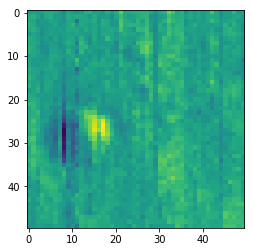

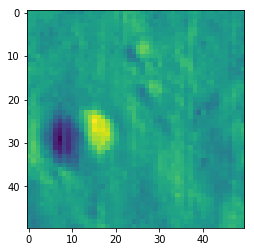

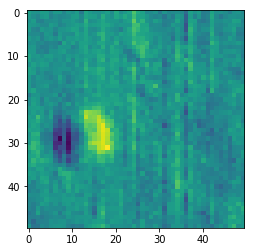

In [4]:
from libpyhat.derived.utils import generic_func
from libpyhat.derived.m3.supplemental_funcs import tilt_func

# Default
res = generic_func(m3_data, [930, 1009], func = tilt_func)
imshow(res)
show()

# Apply tilt to wavelengths 540 and 850
res = generic_func(m3_data, [540, 850], func = tilt_func)
imshow(res)
show()

# Apply tilt to wavelengths 540 and 850, and kernels
res = generic_func(m3_data, [540, 850], kernels = {540: 11, 850: 11}, func = tilt_func)
imshow(res)
show()

## Custom Function with Wavelength Selection

| Using the generic_func, users can also write their own functions and apply them to <br> some data set that has been read in. <br>
|  <br>
| Bellow we define a function called band_average. This function takes in a list of bands and <br> puts both bands into their own variable and then gets the average between those two bands

In [5]:
def band_average(data):
    band1, band2 = data
    return (band1 + band2) / 2

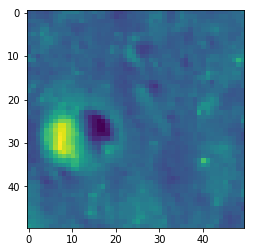

In [6]:
# Showing the band1 we will be using
imshow(m3_data.loc[540])
show()

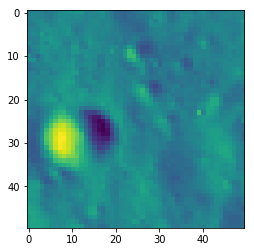

In [7]:
# Showing the band2 we will be using
imshow(m3_data.loc[2976])
show()

## Applying Custom Functions

|  Now that we have defined the function we need to apply it using generic_func. <br> To do so, we need to define the wavelengths we want to use then pass the <br> function to generic_func.

0.13185182213783264
0.13185182
Both should and are about the same if the band_average was applied correctly


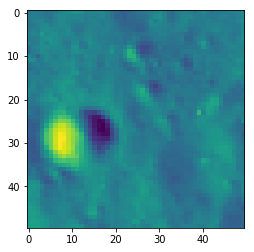

In [8]:
# Get the result from generic_func
res = generic_func(m3_data, [540, 2976], func = band_average)

# Get the 0, 0 value from both band1 and band2
band1_val = m3_data.loc[540][0, 0]
band2_val = m3_data.loc[2976][0, 0]

# Check the result as if we applied the band_average function
# Against the result from generic_func
print((band1_val + band2_val) / 2)
print(res[0, 0])
print("Both should and are about the same if the band_average was applied correctly")

imshow(res)
show()